<a href="https://colab.research.google.com/github/jsh1021902/CUAI_BASIC/blob/main/Basic_%EC%A0%95%EC%84%9C%ED%98%84_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 분류

## 4.1 분류(Classification)의 개요

**< 분류 알고리즘>**
- 베이즈(Bayes) 통계와 생성 모델에 기반한 **나이브 베이즈(Naive Bayes)**
- 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀(Logistic Regression)**
- 데이터 균일도에 따른 규칙 기반의 **결정 트리(Decision Tree)**
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신(Support Vector Machine)**
- 근접 거리를 기준으로 하는 **최소 근접(Nearest Neighbor)** 알고리즘
- **심층 연결 기반의 신경망(Neural Network)**
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**

**앙상블** : 분류에서 가장 각광을 받는 방법 중 하나로, 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 지님
- **배깅(Bagging)** : 대표적인 예, 랜덤 포레스트
- **부스팅(Boosting)** : 뛰어난 예측 성능 지니지만 수행 시간 길어 최적화 모델 튜닝 어려운 그래디언트 부스팅(Gradient Boosting)  
→ 예측 성능 발전되면서 수행 시간 단축된 XgBoost(eXtra Gradient Boost)와 LightGBM 알고리즘
- **스태킹(Stacking)** : 앙상블의 앙상블
- **결정 트리** : 앙상블의 기본 알고리즘  
→ 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 적으나 예측 성능을 향상시키기 위해 복합한 규칙 구조로 인해   
과적합(overfitting)이 발생해 예측 성능 저하될 수 있음
  
→ 앙상블은 여러 개의 약한 학습기를 결합해 활귤적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능 향상시킴

## 4.2 결정 트리

- **결정 트리(Decision Tree)** : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것  
→ 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함

- **규칙 노드(Decision Node)** : 규칙 노드로 표시된 노드는 규칙 조건이 되는 것  
→ 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드 생성됨  
→ 많은 규칙 존재 = 분류를 결정하는 방식 복잡해짐 = 과적합  
→ 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
- **리프 노드(Leaf Node)** : 리프 노드로 표시된 노드는 결정된 클래스 값
- **서브 트리(Sub Tree)** : 새로운 규칙 조건마다 생성되는 서브 트리

In [1]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


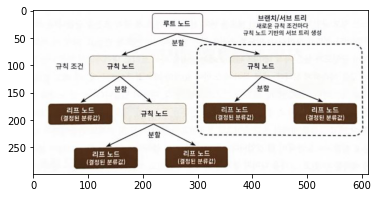

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/결정트리구조.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 **최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록** 결정 노드의 규칙이 정해져야 함  
→ 어떻게 **트리를 분할할 것인가**가 중요 = 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 중요

- 데이터 세트의 **균일도** : 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침  
→ 혼잡도가 높고 균일도가 낮으면, 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요함  
→ **결정 노드**는 **정보 균일도가 높은** 데이터 세트를 먼저 선택하도록 규칙 조건 만듦

**< 정보의 균일도를 측정하는 대표적인 방법 >**
- **정보 이득** : 엔트로피라는 개념을 기반으로 함.  
※ 엔트로피 : 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음.  
→ **정보 이득 지수** : 1 - (엔트로피 지수). 결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할함

- **지니 계수** : 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수 (0이 가장 평등하고 1로 갈수록 불평등함)  
→ 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함
  
▶ **정보 이득이 높거나 지니 계수가 낮은 조건**을 찾아 자식 트리 노드에 걸쳐 반복적으로 분할한 후, 데이터가 모두 특정 분류에 속하면 분할을 멈추고 분류를 결정

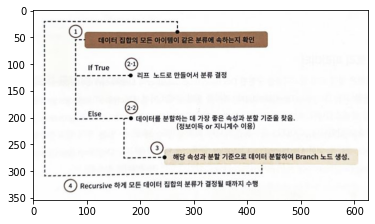

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/지니계수결정트리.JPG')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

### 결정 트리 모델의 특징

- 장점
1. 쉽다. 직관적
2. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

- 단점
1. 과적합으로 알고리즘 성능이 떨어짐.  
→ 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터

- DecisionTreeClassifier : **분류**를 위한 클래스
- DecisionTreeRegressor : **회귀**를 위한 클래스

- CART(Classification And Regression Tree) : 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

- **min_samples_split**
1. 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
2. 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
3. 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가

- **min_samples_leaf**
1. 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
2. Min_samples_split와 유사하게 과적합 제어 용도.   
그러나 비대칭적 데이터의 경우, 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요

- **max_features**
1. 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
2. int형으로 지정하면 대상 피처의 개수. float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
3. 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
4. 'auto'로 지정하면 sqrt와 동일
5. 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
6. 'None'은 전체 피처 선정

- **max_depth**
1. 트리의 최대 깊이를 규정
2. 디폴트는 None.  
None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴.
3. 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

- **max_leaf_nodes**  
: 말단 노드(Leaf)의 최대 개수

### 결정 트리 모델의 시각화

### 결정 트리 과적합(Overfitting)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

## 4.3 앙상블 학습

### 앙상블 학습 개요

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

### 보팅 분류기(Voting Classifier)

## 4.4 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

## 4.5 GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습

### GBM 하이퍼 파라미터 소개

## 4.6 XGBoost(eXtra Gradient Boost)

### XGBoost 개요

### XGBoost 설치하기

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

### 사이킷런 래퍼 XGBoost의 개요 및 적용